## Warmup

### Warmup 1: How does this recursion work? Try it in Python tutor

In [1]:
def chop(s):
    if len(s) < 3:
        return s[0]
    else:
        return s[1] + chop(s[2:])

chop("abcdefghijklmnop")

'bdfhjlno'

In [2]:
# Now, by hand, figure out this output
chop("987654")

'865'

# Error Handling

* [Python Tutor](https://pythontutor.com/visualize.html#mode=edit)

## Reading
* Read: [Sweigart Ch 11](https://automatetheboringstuff.com/2e/chapter11/) (beginning through "Assertions")

## Learning Objectives
    
- Explain the purpose of assert statements, try/except blocks, and raise statements.
- Use an assert statement to force a program to crash, and trace code that uses assert.
- Use try/except blocks to catch runtime errors and deal with them
  - by specifying the exception(s) caught
  - by using the exception object
- Use the raise statement to raise an exception that may be caught in another part of the program
- Hand trace code that uses assert, try/except blocks and raise statements



In [3]:
# import statements
import math

### Why might you want your code to crash more?

- It is easier to debug the program if we get a stack trace
- Semantic errors are the scariest because we don't get any kind of error

<div>
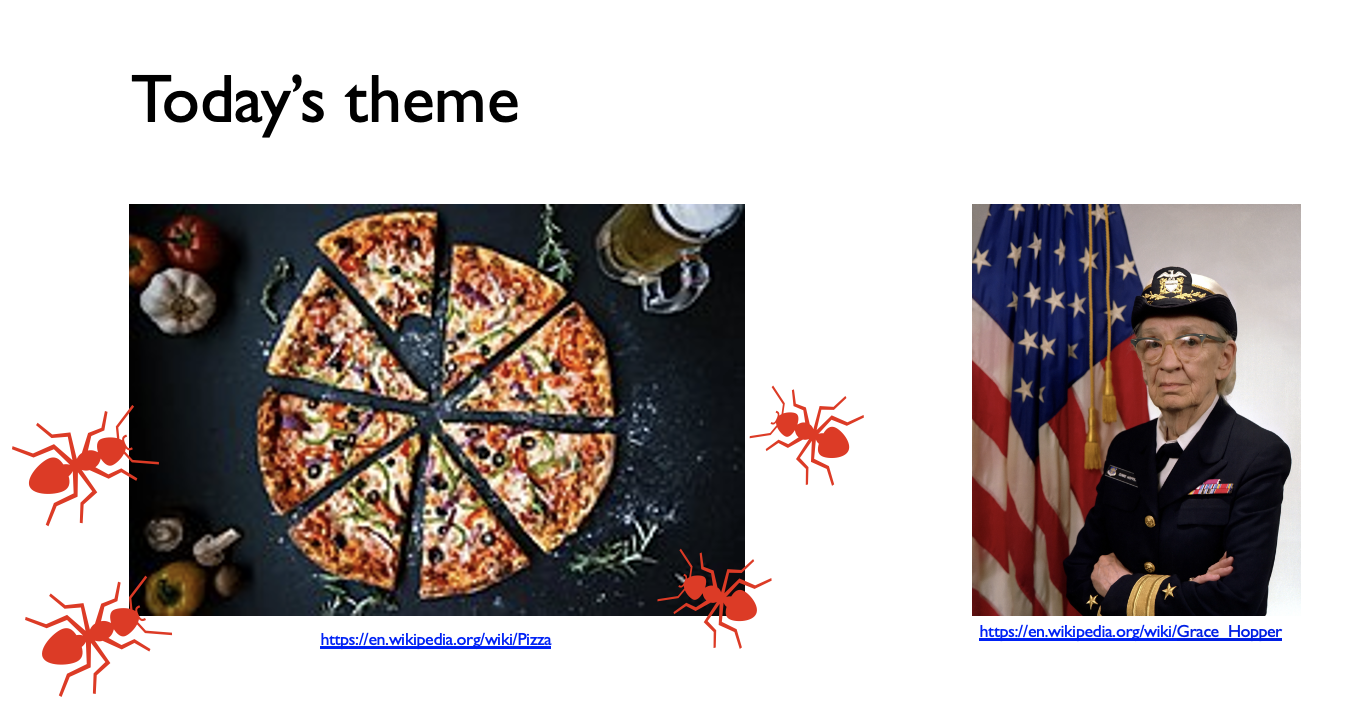
</div>

[Grace Hopper](https://en.wikipedia.org/wiki/Grace_Hopper)

## Pizza Analyzer

In [4]:
import math

def pizza_size(radius):
    return (radius ** 2) * math.pi

def slice_size(radius, slice_count):
    total_size = pizza_size(radius)
    return total_size * (1 / slice_count)

def main():
    for i in range(3):
        # grab input
        args = input("Enter pizza diameter(inches), slice count: ")
        args = args.split(',')
        radius = float(args[0].strip()) / 2
        slices = int(args[1].strip())

        # pizza analysis
        size = slice_size(radius, slices)
        print('PIZZA: radius = {}, slices = {}, slice square inches = {}'
              .format(radius, slices, size))

### Try valid input of 4, 4 for main invocation

In [5]:
main()

Enter pizza diameter(inches), slice count:  3,3


PIZZA: radius = 1.5, slices = 3, slice square inches = 2.356194490192345


Enter pizza diameter(inches), slice count:  4,4


PIZZA: radius = 2.0, slices = 4, slice square inches = 3.141592653589793


Enter pizza diameter(inches), slice count:  10,6


PIZZA: radius = 5.0, slices = 6, slice square inches = 13.08996938995747


### Can you think of any inputs that will make this program crash?

Try each of these bad inputs:
- 10, 0: ZeroDivisionError
- 10: IndexError
- 10, hello: ValueError
- 10, 4.5: ValueError
- 10, -4: Semantic error
- -10, 4: Semantic error (scariest error for this example)

In [7]:
main()

Enter pizza diameter(inches), slice count:  -10,4


PIZZA: radius = -5.0, slices = 4, slice square inches = 19.634954084936208


Enter pizza diameter(inches), slice count:  10,hello


ValueError: invalid literal for int() with base 10: 'hello'

### Why is -10, 4 the scariest error in the above examples?

In [ ]:
#  -10, 4: Semantic error (scariest error for this example)

## `assert` statements
- `assert` statements enable you to convert semantic errors into runtime errors
    - runtime errors are easier to debug than semantic errors
- `assert` statements make your program very slow!
    - so sometimes programmers disable these (we won't be learning about this)
- Syntax: `assert BOOLEAN_EXPRESSION`
    - BOOLEAN_EXPRESSION evaluates to `True`: nothing happens (move on to next line of code)
    - BOOLEAN_EXPRESSION evaluates to `False`: program carshes with `AssertionError`
       
<div>
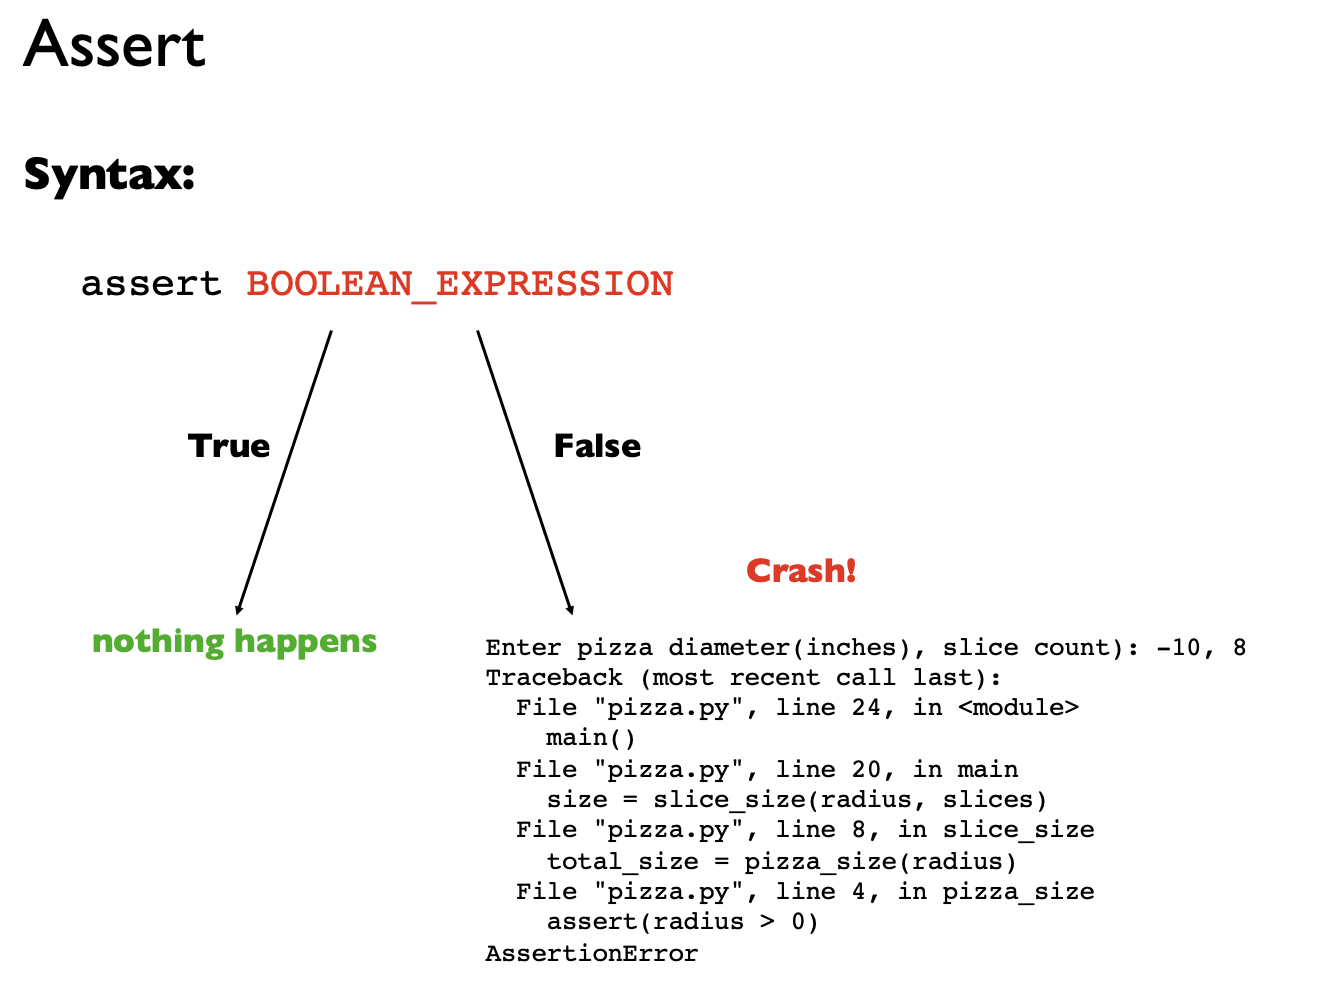
</div>

In [8]:
# simple example

age = int(input("Enter your age: "))
assert age >= 0 # if True, do nothing else, crash
print("In five years you will be", age + 5, "years old")

Enter your age:  -3


AssertionError: 

<div>
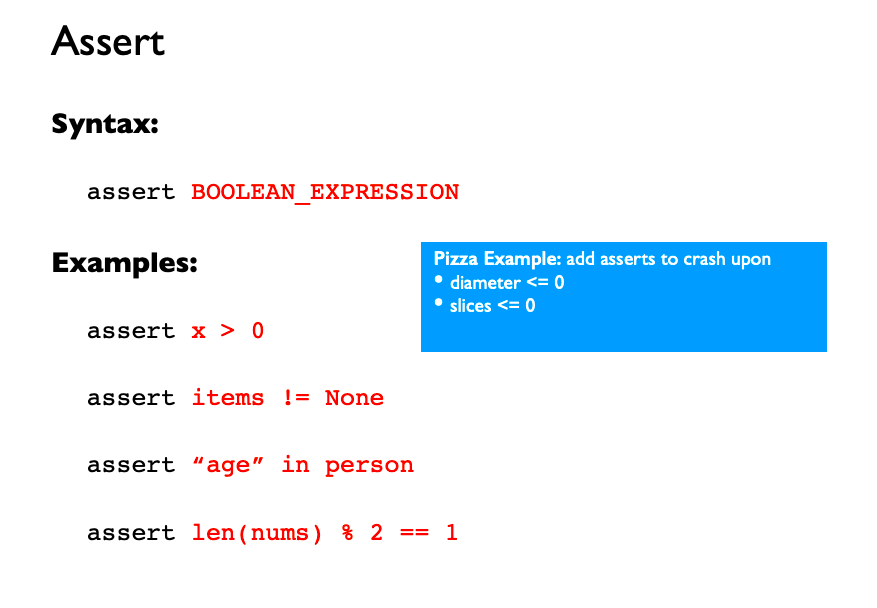
</div>

### Let's improve error handling in pizza analyzer
- using `assert`:
    - `assert` that radius is positive
    - `assert` that slice count is positive

In [9]:
# Add assert statements to the pizza_size_v2 and slice_size_v2 functions
# to make sure parameter values are positive

import math

def pizza_size_v2(radius):
    assert radius >= 0
    return (radius ** 2) * math.pi

def slice_size_v2(radius, slice_count):
    assert slice_count > 0
    total_size = pizza_size(radius)
    return total_size * (1 / slice_count)

def main_v2():
    for i in range(3):
        # grab input
        args = input("Enter pizza diameter(inches), slice count: ")
        args = args.split(',')
        radius = float(args[0].strip()) / 2
        slices = int(args[1].strip())

        # pizza analysis
        size = slice_size_v2(radius, slices)
        print('PIZZA: radius = {}, slices = {}, slice square inches = {}'
              .format(radius, slices, size))

### Try these problematic inputs for the main() function invocation

- 10, -4: Semantic error
- -10, 4: Semantic error (scariest error for this example)

In [10]:
main_v2()

Enter pizza diameter(inches), slice count:  10,-4


AssertionError: 

## What if we want to keep running even if there is an error?

That is, we don't want to pause the program execution for user's incorrect input

## try / except blocks

- `try` and `except` blocks come in pairs (runtime errors are “exceptions”)
  - exception comes from "exceptional control flow" 
  - remember control flow: sequential, conditional, iteration, function calls
- Python tries to run the code in the `try` block.
    - If there is an exception, `try` block execution terminates and then `except` block gets executed(instead of crashing). This is called “catching” the exception.
    - If there is no exception, `except` block doesn't get executed.
- Syntax (example):
  
```python
try:
    flaky_function()
except:
    print("error!") # or some other handling
```

### try / except examples
Try these examples using PythonTutor

### Example 1: v1

In [11]:
try:
    print("2 inverse is", 1/2)
    print("1 inverse is", 1/1)
    print("0 inverse is", 1/0)
    print("-1 inverse is", -1/1)
    print("-2 inverse is", -1/1)
except:
    print("that's all, folks!")

2 inverse is 0.5
1 inverse is 1.0
that's all, folks!


### Example 1: v2

In [12]:
try:
    print("2 inverse is", 1/2)
    print("1 inverse is", 1/1)
    print("0 inverse is", 1/0)
except:
    print("that's all, folks!")

try:
    print("-1 inverse is", -1/1)
    print("-2 inverse is", -1/1)
except:
    print("This will never get executed!")

2 inverse is 0.5
1 inverse is 1.0
that's all, folks!
-1 inverse is -1.0
-2 inverse is -1.0


### Example 2: v1
- hierarchy of catching exceptions

In [13]:
def buggy():
    print("buggy: about to fail")
    print("buggy: infinity is ", 1/0)
    print("buggy: oops!") # never prints

def g():
    print("g: before buggy")
    buggy()
    print("g: after buggy") # never prints

def f():
    try:
        print("f: let's call g")
        g()
        print("f: g returned normally") # never prints
    except:
        print("f: that didn't go so well")

f()

f: let's call g
g: before buggy
buggy: about to fail
f: that didn't go so well


### Example 2: v2
- hierarchy of catching exceptions

In [14]:
def buggy():
    print("buggy: about to fail")
    print("buggy: infinity is ", 1/0)
    print("buggy: oops!") # never prints

def g():
    print("g: before buggy")
    try:
        buggy()
    except:
        print("g: that didn't go well")
    print("g: after buggy") 

def f():
    try:
        print("f: let's call g")
        g()
        print("f: g returned normally") 
    except:
        print("f: that didn't go so well") # never prints

f()

f: let's call g
g: before buggy
buggy: about to fail
g: that didn't go well
g: after buggy
f: g returned normally


### Example 2: v3
- hierarchy of catching exceptions

In [15]:
def buggy():
    try:
        print("buggy: about to fail")
        print("buggy: infinity is ", 1/0)
    except:
        print("buggy: oops!") 

def g():
    print("g: before buggy")
    try:
        buggy()
    except:
        print("g: that didn't go well") # never prints
    print("g: after buggy")

def f():
    try:
        print("f: let's call g")
        g()
        print("f: g returned normally") 
    except:
        print("f: that didn't go so well") # never prints

f()

f: let's call g
g: before buggy
buggy: about to fail
buggy: oops!
g: after buggy
f: g returned normally


### What if we want to know the reason for the exception?

- Syntax (example):
```python
try:
    flaky_function()
except Exception as e:
    print("error because:", str(e))
    print("type of exception:", type(e))
```
- `Exception` is a type.
- `e` is a variable that references an object instance of type `Exception` (very general)
    - there are different types of exceptions
- `str(e)` gives you the reason for the exception.
- `type(e)` will give you the type of the exception.

In [16]:
# Modify the catch to use "Exception as e" and print out the str(e) and type(e)
try:
    print("buggy: about to fail")
    print("buggy: infinity is ", 1/0)
except Exception as e:
    print("buggy: oops!") 
    print("error because:",str(e))
    print("type of exception",type(e))


buggy: about to fail
buggy: oops!
error because: division by zero
type of exception <class 'ZeroDivisionError'>


### Let's improve error handling in pizza analyzer more
- using `try` ... `except` ... 

In [17]:
# Add the try / except blocks to this main_v3() to do the following:

# 1) verify input
# 2) verify math

# If there is an exception, print out the type() and str() of the exception

import math

def main_v3():
    for i in range(3):
        try:
            # grab input
            args = input("Enter pizza diameter(inches), slice count: ")
            args = args.split(',')
            radius = float(args[0].strip()) / 2
            slices = int(args[1].strip())
        except Exception as e:
            print("Bad input & reason is:", str(e))
            print("Type of exception:", type(e))
            continue

        try:
            # pizza analysis
            size = slice_size_v2(radius, slices)
            print('PIZZA: radius = {}, slices = {}, slice square inches = {}'
                  .format(radius, slices, size))
        except Exception as e:
            print("Pizza analysis error & reason is:", str(e))
            print("Type of exception:", type(e))

### Try these problematic inputs for the main() function invocation

- 10, 0: ZeroDivisionError
- 10: IndexError
- 10, hello: ValueError
- 10, 4.5: ValueError
- 10, -4: AssertionError (after we wrote assert statement)
- -10, 4: AssertionError (after we wrote assert statement)

In [18]:
main_v3()

Enter pizza diameter(inches), slice count:  10,0


Pizza analysis error & reason is: 
Type of exception: <class 'AssertionError'>


Enter pizza diameter(inches), slice count:  10


Bad input & reason is: list index out of range
Type of exception: <class 'IndexError'>


Enter pizza diameter(inches), slice count:  10,hello


Bad input & reason is: invalid literal for int() with base 10: 'hello'
Type of exception: <class 'ValueError'>


### `Exception` is broad
- it catches nearly all types of exceptions
- you may not want your except block to catch every possible exception!

In [19]:
# Let's create an intentional SyntaxError

def main_v3():
    for i in range(3):
        try:
            # grab input
            args = input("Enter pizza diameter(inches), slice count: ")
            args = args.split(',')
            radius = float(args[0].strip()) / 2
            slicessssssssssssssssss = int(args[1].strip())
        except Exception as e:
            print("Bad input & reason is:", str(e))
            print("Type of exception:", type(e))
            
        try:
            # pizza analysis
            size = slice_size_v2(radius, slices)
            print('PIZZA: radius = {}, slices = {}, slice square inches = {}'
                  .format(radius, slices, size))
        except Exception as e:
            print("Pizza analysis error & reason is:", str(e))
            print("Type of exception:", type(e))

In [20]:
main_v3() # oops, we made our program way too robust!

Enter pizza diameter(inches), slice count:  4,4


Pizza analysis error & reason is: name 'slices' is not defined
Type of exception: <class 'NameError'>


KeyboardInterrupt: Interrupted by user

Enter pizza diameter(inches), slice count:  


### How can we make `except` block <u>**catch specific exceptions**</u>?

- Syntax (example):
```python
try:
    flaky_function()
except (ValueError, IndexError) as e:
    print("error because:", str(e))
    print("type of exception:", type(e))
```

In [21]:
# Let's fix our except blocks
# Have the first exception block catch ValueError, TypeError, and IndexError
# Have second exception block catch ZeroDivisionError and AssertionError
# Try introducing the intentional SyntaxError now

def main_v3():
    for i in range(3):
        try:
            # grab input
            args = input("Enter pizza diameter(inches), slice count: ")
            args = args.split(',')
            radius = float(args[0].strip()) / 2
            slices = int(args[1].strip())
        except (ValueError,TypeError,IndexError) as e:
            print("Bad input & reason is:", str(e))
            print("Type of exception:", type(e))
            continue
            
        try:
            # pizza analysis
            size = slice_size_v2(radius, slices)
            print('PIZZA: radius = {}, slices = {}, slice square inches = {}'
                  .format(radius, slices, size))
        except (ZeroDivisionError,AssertionError) as e:
            print("Pizza analysis error & reason is:", str(e))
            print("Type of exception:", type(e))

### Try these problematic inputs for the main() function invocation

- 10, 0: ZeroDivisionError
- 10: IndexError
- 10, hello: ValueError
- 10, 4.5: ValueError
- 10, -4: AssertionError (after we wrote assert statement)
- -10, 4: AssertionError (after we wrote assert statement)

In [22]:
main_v3()

Enter pizza diameter(inches), slice count:  10,0


Pizza analysis error & reason is: 
Type of exception: <class 'AssertionError'>


Enter pizza diameter(inches), slice count:  10


Bad input & reason is: list index out of range
Type of exception: <class 'IndexError'>


Enter pizza diameter(inches), slice count:  10,4.5


Bad input & reason is: invalid literal for int() with base 10: '4.5'
Type of exception: <class 'ValueError'>


### Exception hierarchy
- It helps to know some common excpeptions and to know their hierarchy.
  


- Don't try to memorize this but do make a note of the exceptions that occur the most often.
- Python documentation: https://docs.python.org/3/library/exceptions.html.

## `raise` statements
- Rather than using assert we can also raise a specific error. 

- Syntax (example):
```python
if BOOLEAN_CONDITION:
    raise ArithmeticError("details of error")
```

<div>
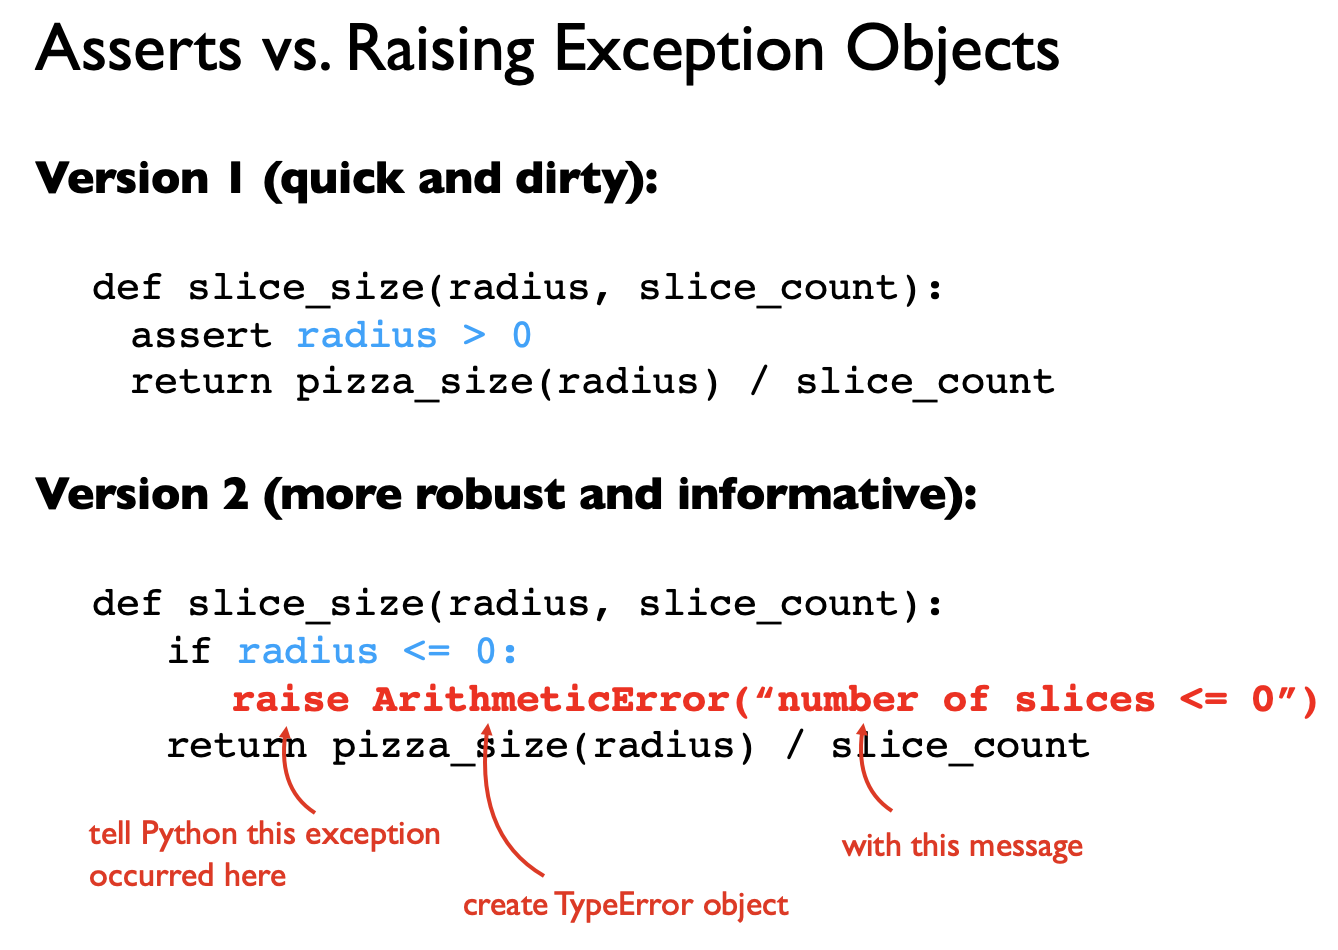
</div>

In [23]:
# simple example: raise exceptions instead of using assert statements

age = int(input("enter your age: "))
if age < 0:
    raise ArithmeticError("age can't be negative") # we can 'raise' a relevant exception
print("in five years you will be", age + 5, "years old") 

enter your age:  -5


ArithmeticError: age can't be negative

In [26]:
# Copy pasted code (not a typical thing which I will ask you to do) 
# change function definitions to raise ArithmeticError

def pizza_size_v2(radius):
    if radius <= 0:
        raise ArithmeticError("Invalid radius size!")
    return (radius ** 2) * math.pi

def slice_size_v2(radius, slice_count):
    if slice_count < 0:
        raise ArithmeticError("Invalid slice count!")
    total_size = pizza_size_v2(radius)
    return total_size * (1 / slice_count)

def main_v3():
    for i in range(3):
        # grab input
        try:
            args = input("Enter pizza diameter(inches), slice count: ")
            args = args.split(',')
            radius = float(args[0].strip()) / 2
            slices = int(args[1].strip())
        except (ValueError, TypeError, IndexError) as e:
            print("Bad input & reason is:", str(e))
            print("Type of exception:", type(e))
            continue

        # pizza analysis
        try:
            size = slice_size_v2(radius, slices)
            print('PIZZA: radius={}, slices={}, slice square inches={}'
                  .format(radius, slices, size))
        except (ZeroDivisionError, AssertionError, ArithmeticError) as e:
            print("Pizza analysis error!", str(e))
            print("Type of exception:", type(e))

### Try these problematic inputs for the main() function invocation

- 10, -4: ArithmeticError (after we wrote assert statement)
- -10, 4: ArithmeticError (after we wrote assert statement)

In [27]:
main_v3()

Enter pizza diameter(inches), slice count:  10,-4


Pizza analysis error! Invalid slice count!
Type of exception: <class 'ArithmeticError'>


Enter pizza diameter(inches), slice count:  -10,4


Pizza analysis error! Invalid radius size!
Type of exception: <class 'ArithmeticError'>


Enter pizza diameter(inches), slice count:  4,4


PIZZA: radius=2.0, slices=4, slice square inches=3.141592653589793
